In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
files = ["1em10_pureAQGC.csv", "1em10_interference.csv","1em11_interference.csv","1em12_interference.csv","1em11_pureAQGC.csv", "1em12_pureAQGC.csv","pureSM.csv"]

In [3]:
def graph_error(info, shade):
    vals_normalized = np.histogram(info, bins=25,  density = True)
    y_temp,bins = vals_normalized
    
    vals = np.histogram(info, bins=25)
    notNormy_temp, _ = vals
    
    x_temp = (bins[:-1] + bins[1:]) / 2
    y = []
    x = []
    notNormy = []
    for i, val in enumerate(y_temp):
        if val != 0:
            y.append(val)
            x.append(x_temp[i])
            notNormy.append(notNormy_temp[i])
    
    norm_errors = np.sqrt(notNormy)
    relErrors = np.divide(norm_errors,notNormy, out=np.zeros_like(norm_errors),where=notNormy!=0) 
    errors =  y * relErrors
    
    plt.errorbar(x, y, yerr=errors, fmt=".", color = shade)

In [4]:
def graph_files(files, column):
    for file in files:
        #clean-up
        data_temp = pd.read_csv(file, delimiter=" ")
        data = data_temp.dropna()
        info_temp = data[column]
        info = info_temp.drop(info_temp.index[info_temp.size-1])
        
        #plotting
        title = file.split(".")[0]
        _, _, patches = plt.hist(info, bins=25, label=title+" w/ mean: "+str(round(info.mean(),3)), density = True)
        shade = patches[0].get_facecolor()
        graph_error(info, shade)
        plt.xlabel(column)
    plt.ylabel('counts')
    plt.title('Overlayed Plots')
    plt.legend()
    plt.show()

In [5]:
def graph_data(datas, column):
    for data in datas:
        #clean-up
        title = data
        info_temp = datas[data].dropna()
        info = info_temp.drop(info_temp.index[info_temp.size-1])
        
        #plotting
        _, _, patches = plt.hist(info, bins=25, label=title+" w/ mean: "+ str(round(info.mean(),3)), density = True)
        shade = patches[0].get_facecolor()
        graph_error(info, shade)
        plt.xlabel(column)
    plt.ylabel('counts')
    plt.title('Overlayed Plots')
    plt.legend()
    plt.show()

In [6]:
#sorting the given files
cols = []
allcols = pd.read_csv(files[0], delimiter=" ").columns
name = allcols[1]
index = 1
while name != "w_Default":
    cols.append(name)
    name = allcols[index]
    index+=1

#removing any rows where is3lepton!=1
col = "is3lepton"
inter_data = pd.read_csv("1em10_interference.csv", delimiter=" ")
pureBSM_data = pd.read_csv("1em10_pureAQGC.csv", delimiter=" ")

inter_10 = inter_data[col]
pureBSM_10 = pureBSM_data[col]

for i, each in enumerate(pureBSM_10):
    if each != 1 and i!=pureBSM_10.shape[0]-1:
        pureBSM_10 = pureBSM_10.drop(i)

for j, each in enumerate(inter_10):
    if each != 1 and i!=inter_10.shape[0]-1:
        inter_10 = inter_10.drop(j)

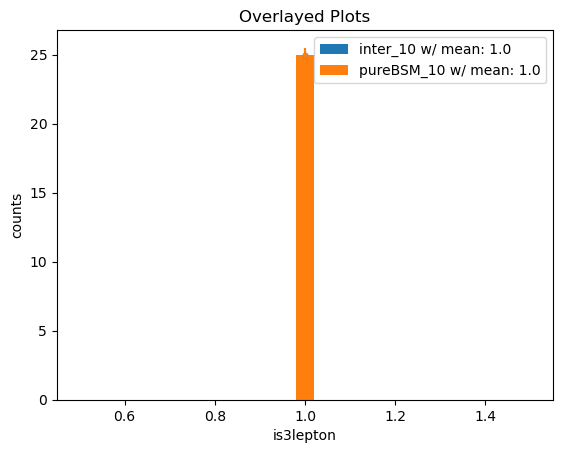

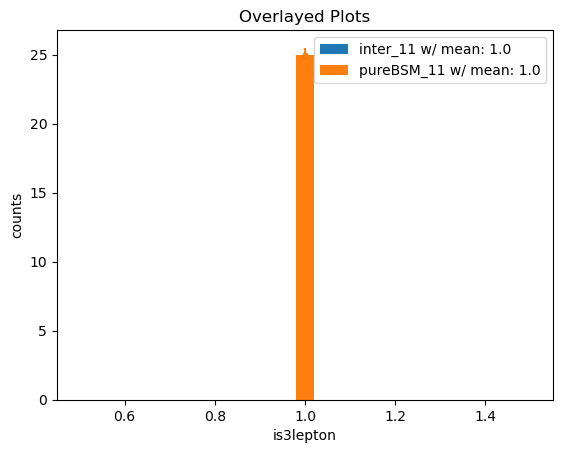

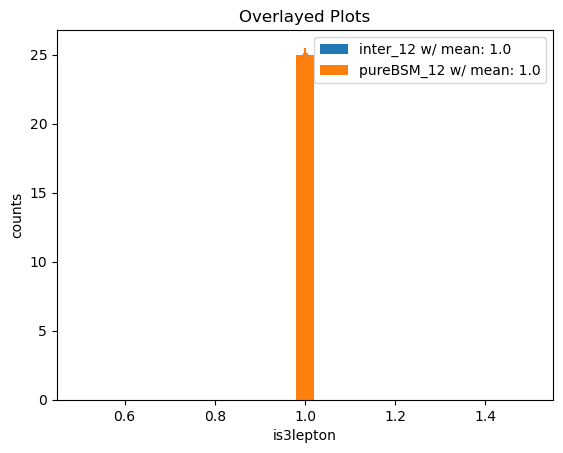

In [7]:
#graphing is3leptons graphs manually
col = "is3lepton"

pureBSM11_data = pd.read_csv("1em11_pureAQGC.csv", delimiter=" ")
pureBSM12_data = pd.read_csv("1em12_pureAQGC.csv", delimiter=" ")
inter11_data = pd.read_csv("1em11_interference.csv", delimiter=" ")
inter12_data = pd.read_csv("1em12_interference.csv", delimiter=" ")

pureBSM_11 = pureBSM11_data[col]
pureBSM_12 = pureBSM12_data[col]
inter_11 = inter11_data[col]
inter_12 = inter12_data[col]

datas = {"inter_10": inter_10, "pureBSM_10":pureBSM_10}
graph_data(datas, col)

datas1 = {"inter_11": inter_11, "pureBSM_11":pureBSM_10}
graph_data(datas1, col)

datas2 = {"inter_12": inter_12, "pureBSM_12":pureBSM_12}
graph_data(datas2, col)

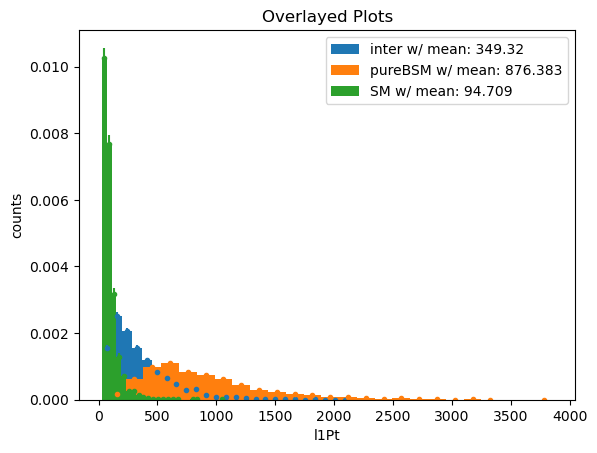

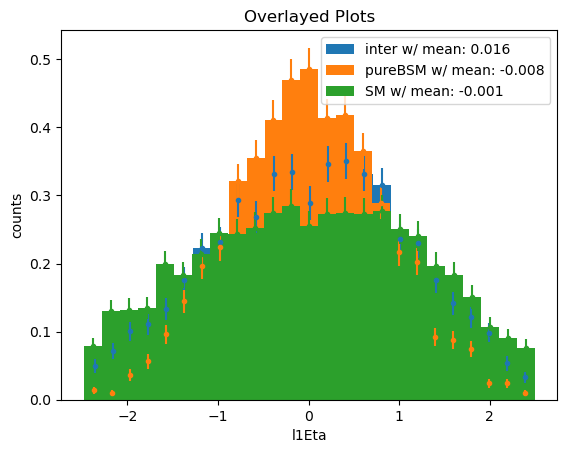

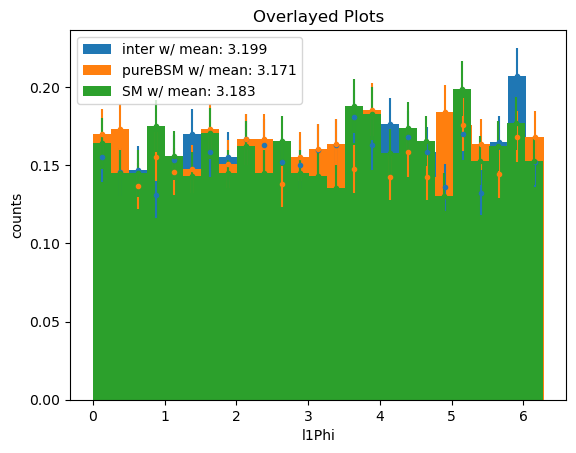

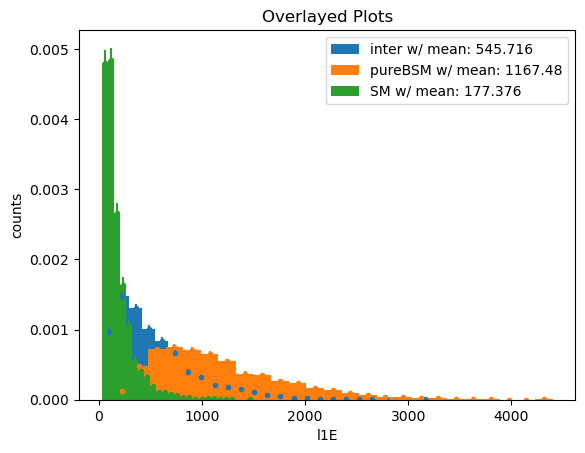

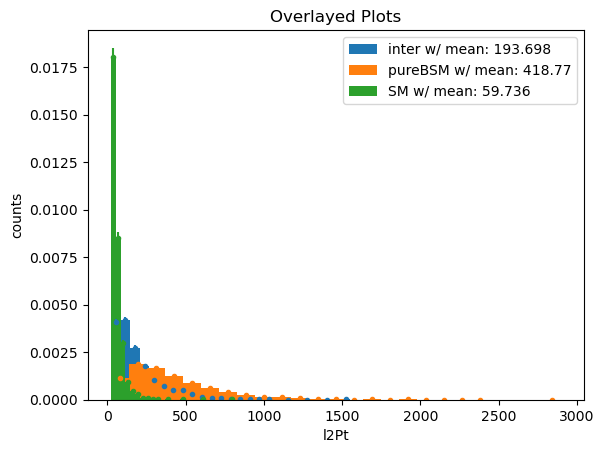

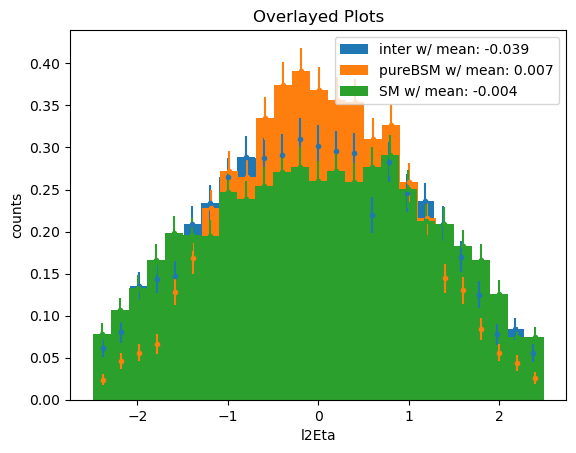

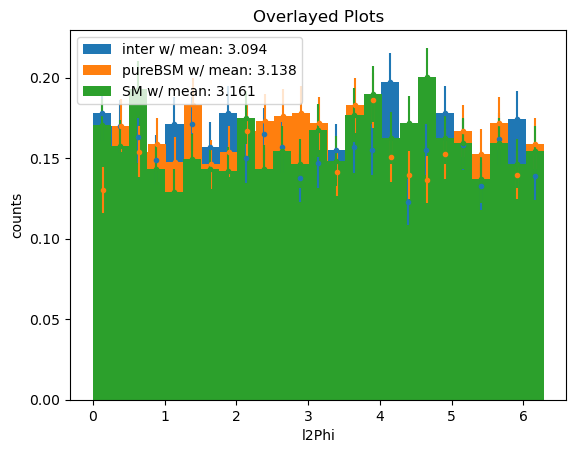

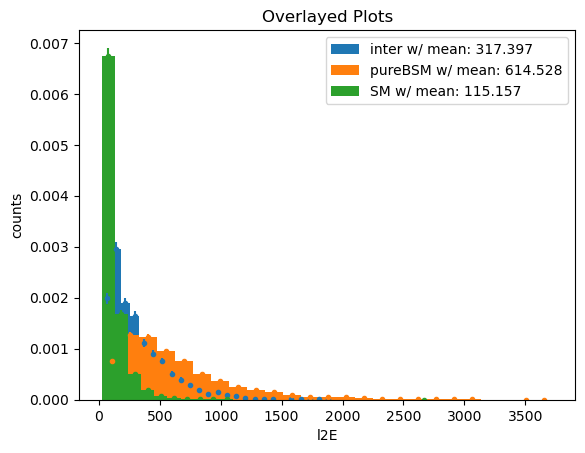

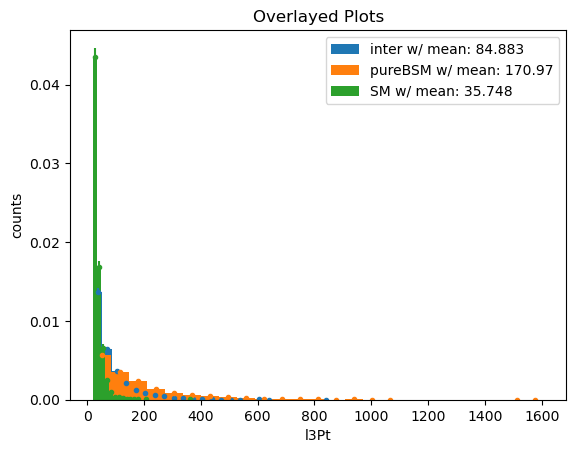

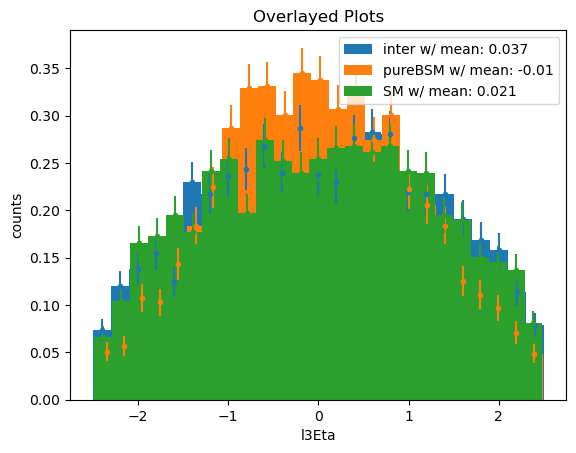

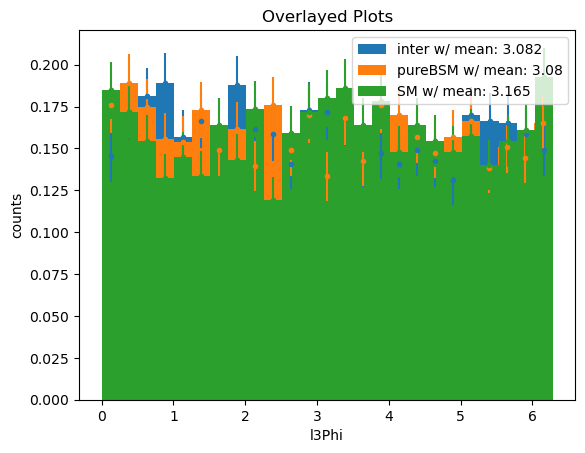

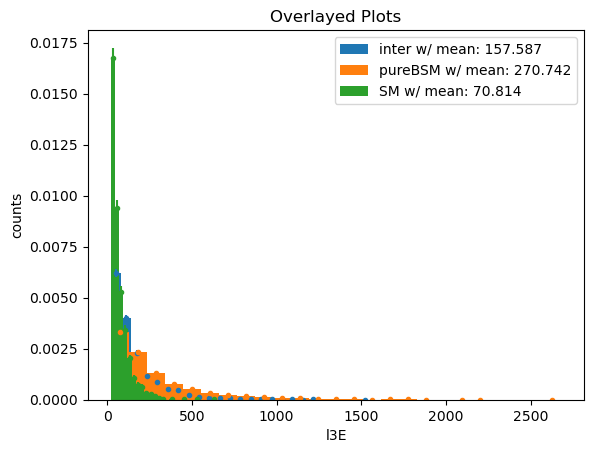

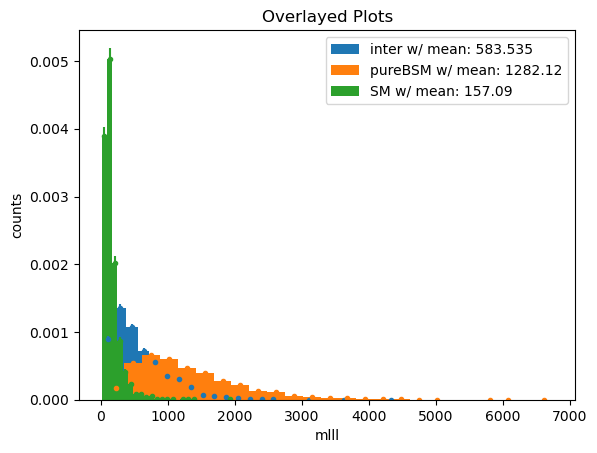

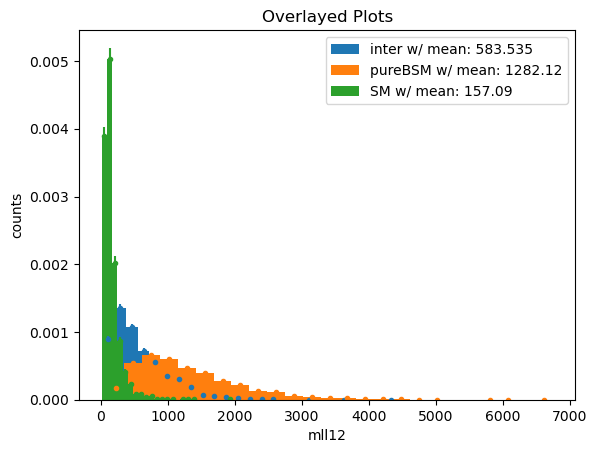

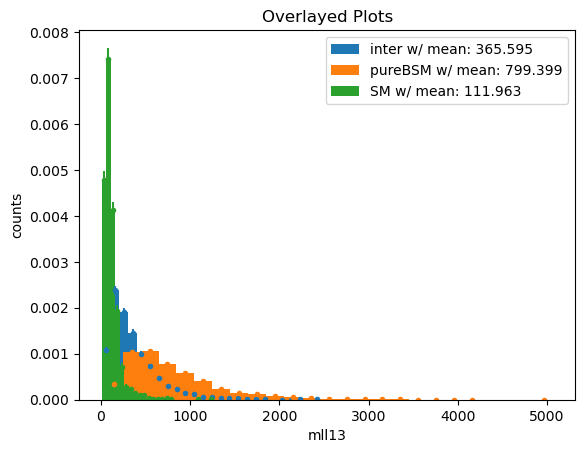

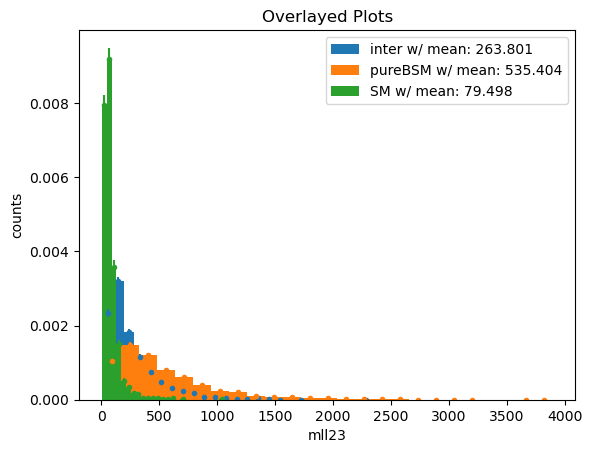

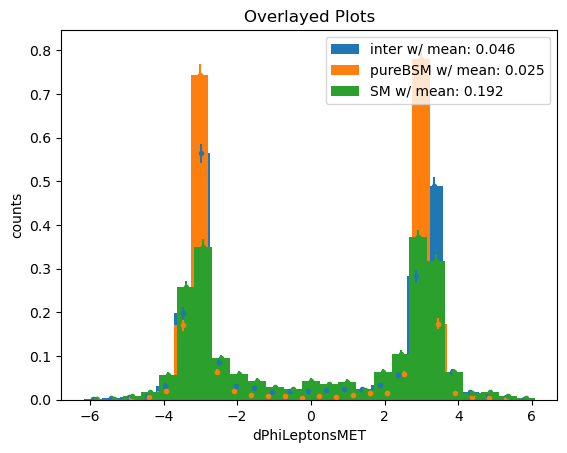

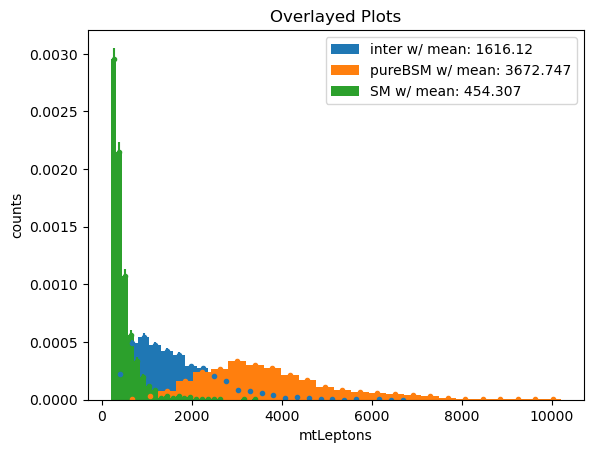

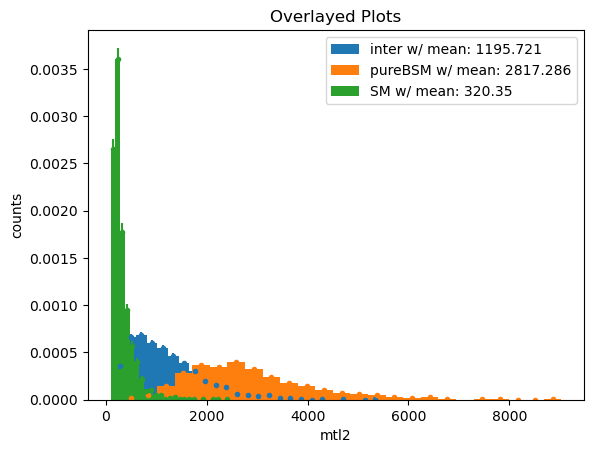

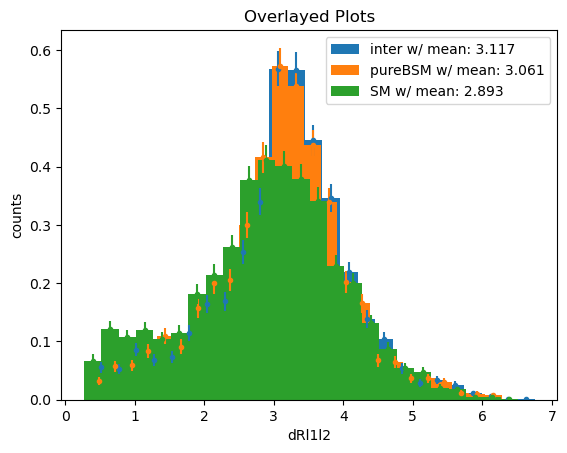

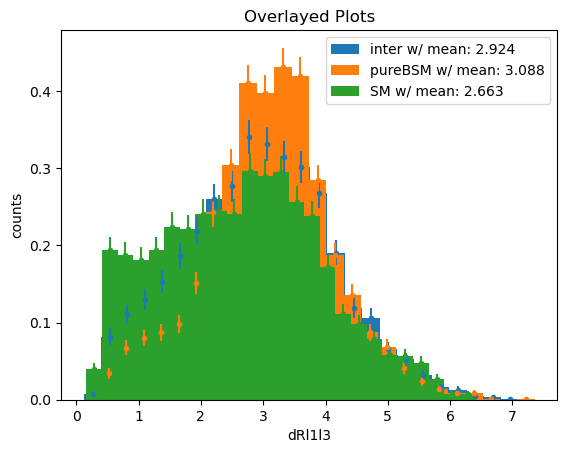

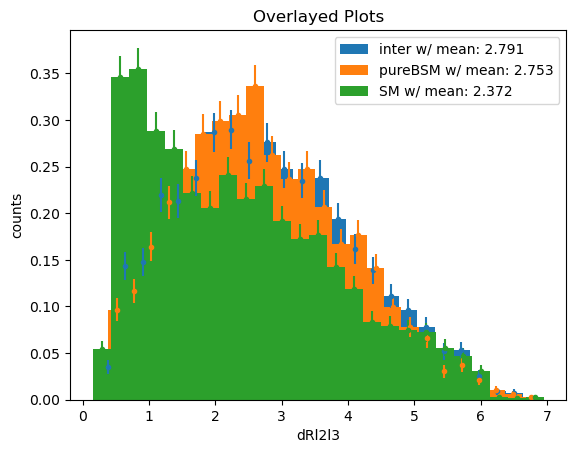

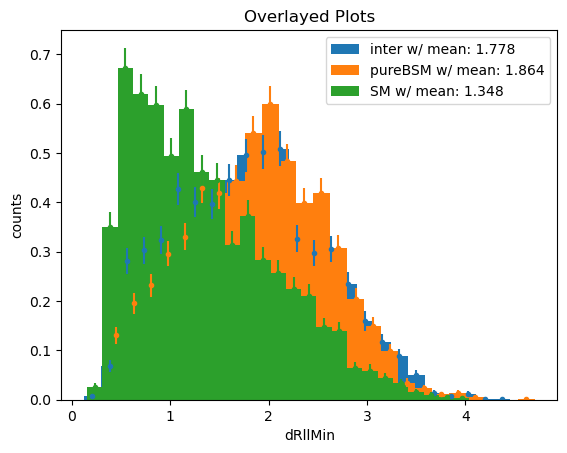

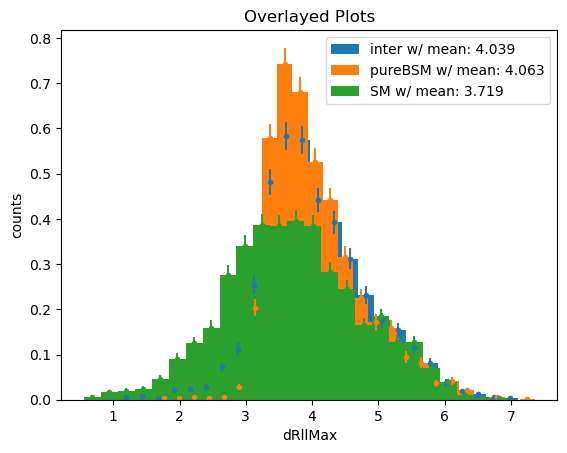

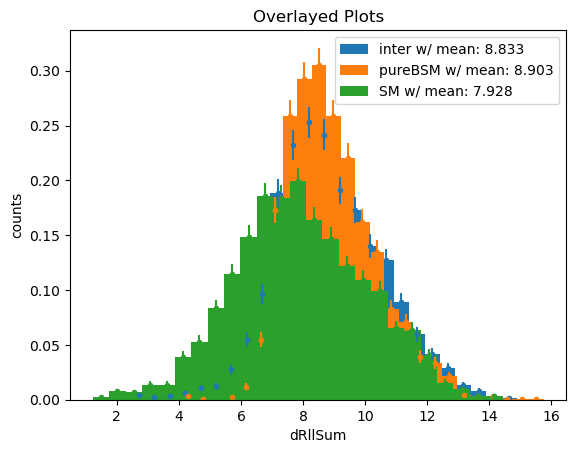

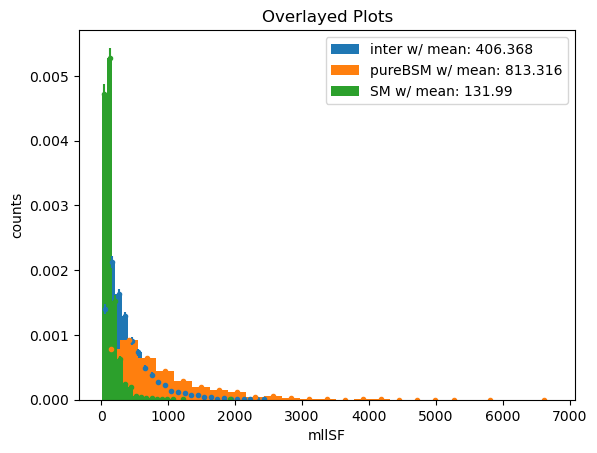

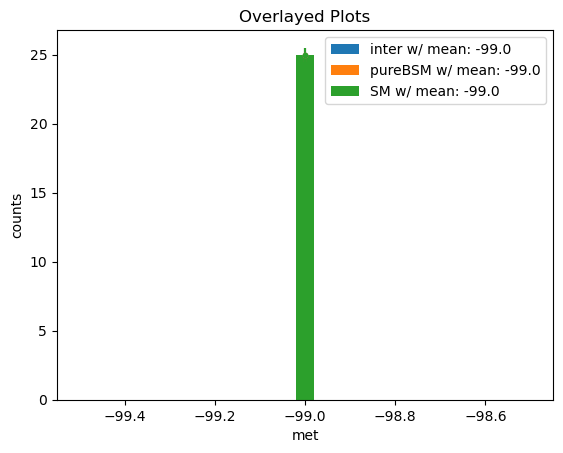

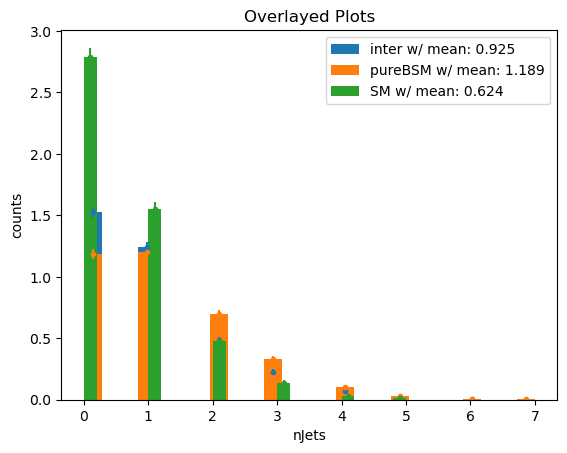

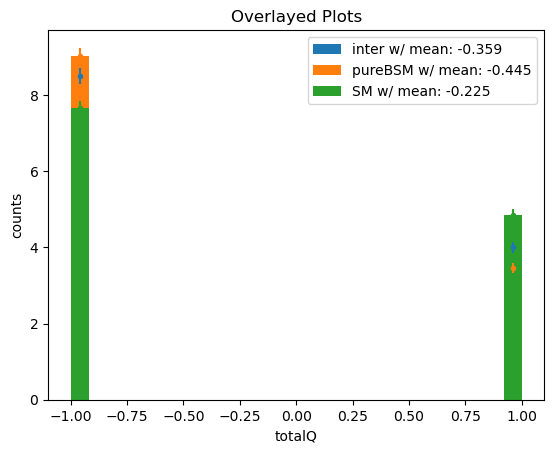

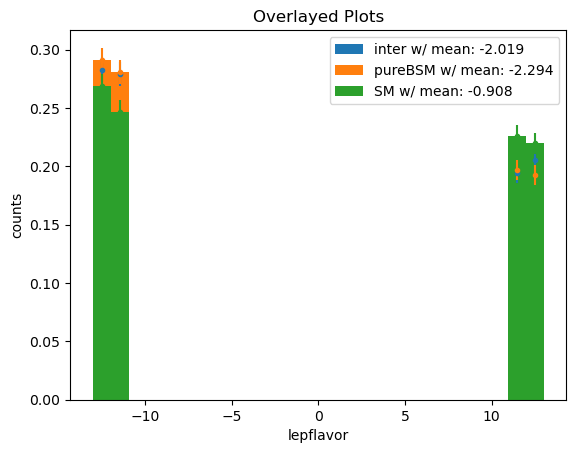

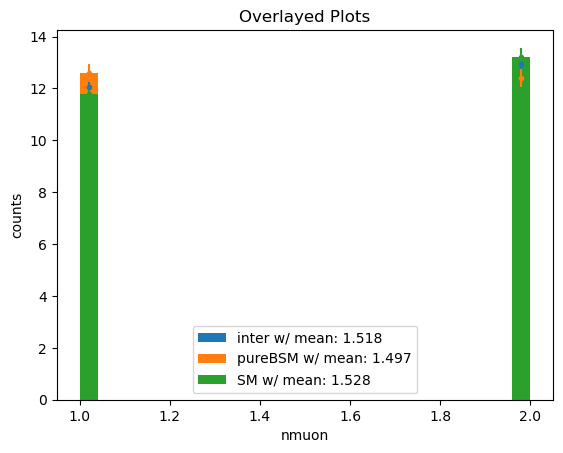

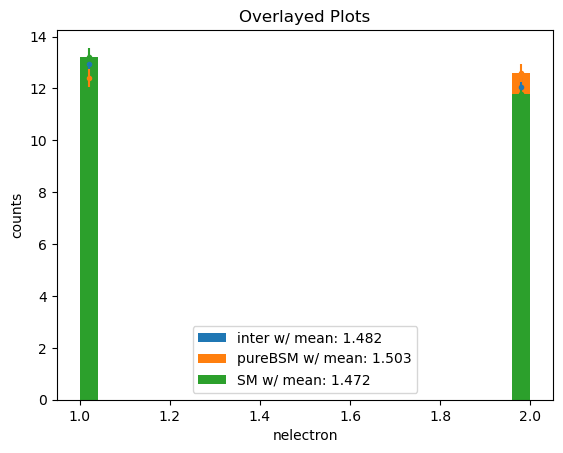

In [8]:
#1em10
inter_data = pd.read_csv("1em10_interference.csv", delimiter=" ")
pureBSM_data = pd.read_csv("1em10_pureAQGC.csv", delimiter=" ")
pureSM_data = pd.read_csv("pureSM.csv", delimiter=" ")

for col in cols:
    if col!="is3lepton":
        inter = inter_data[col]
        pureBSM = pureBSM_data[col]
        SM = pureSM_data[col]

        datas = {"inter": inter, "pureBSM":pureBSM, "SM": SM}
        graph_data(datas, col)

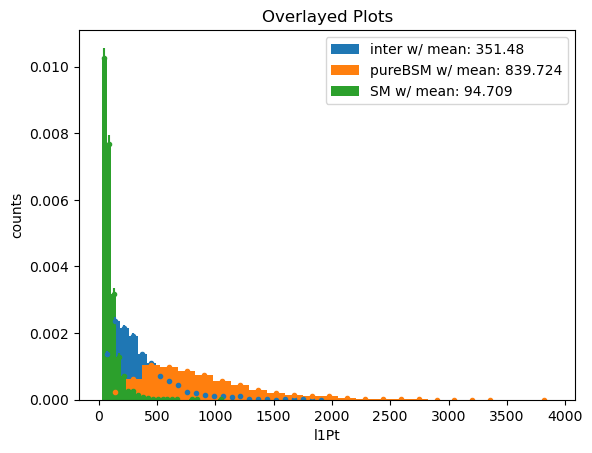

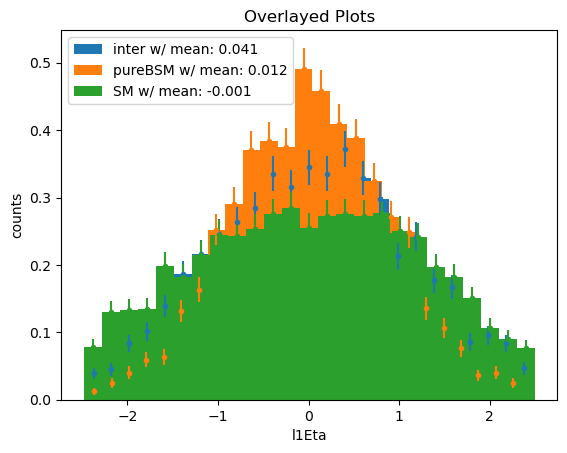

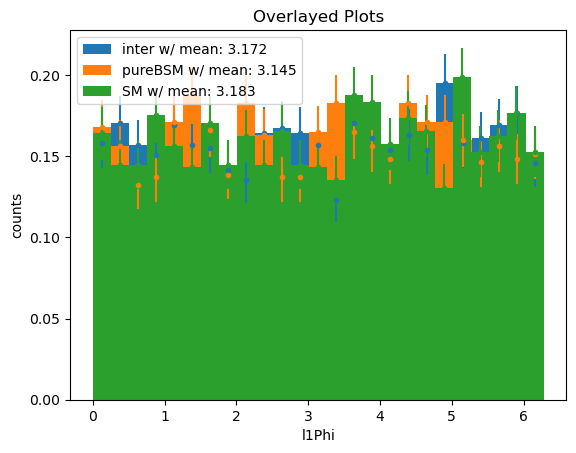

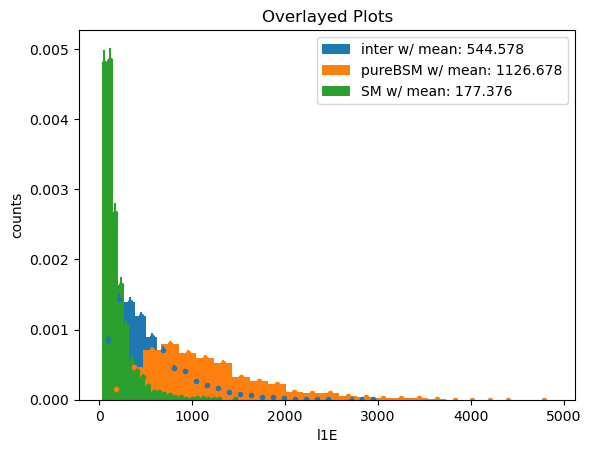

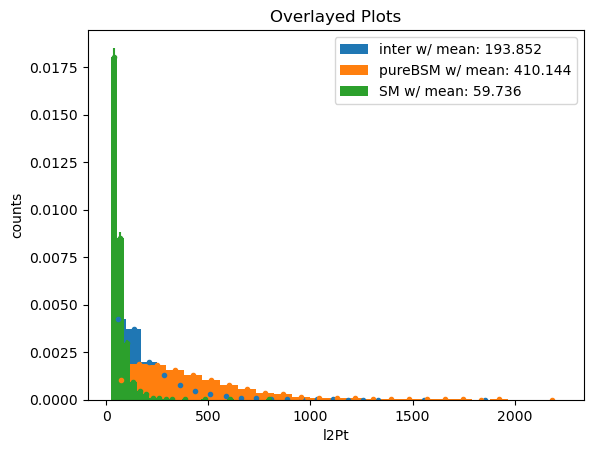

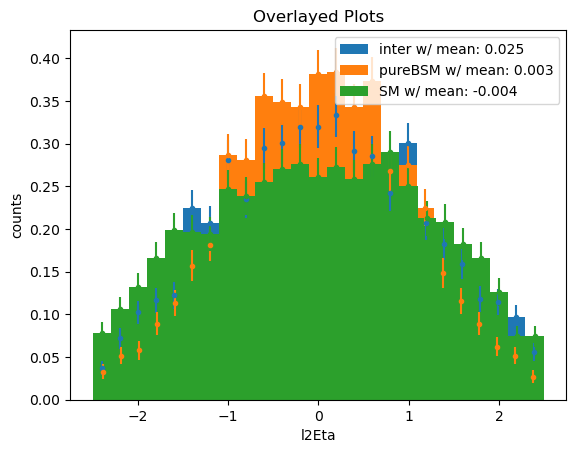

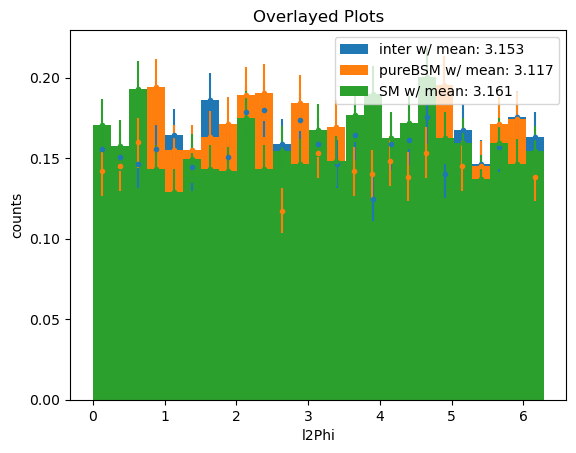

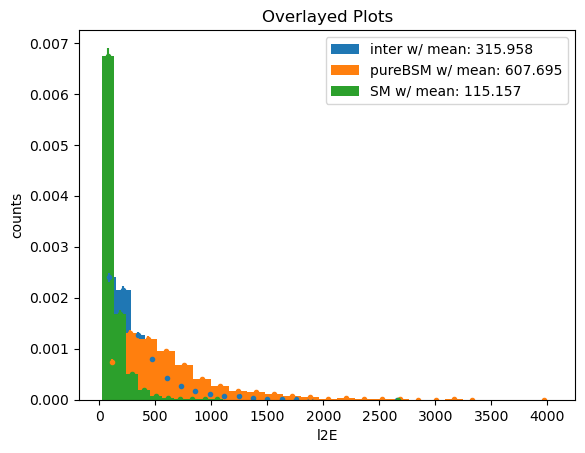

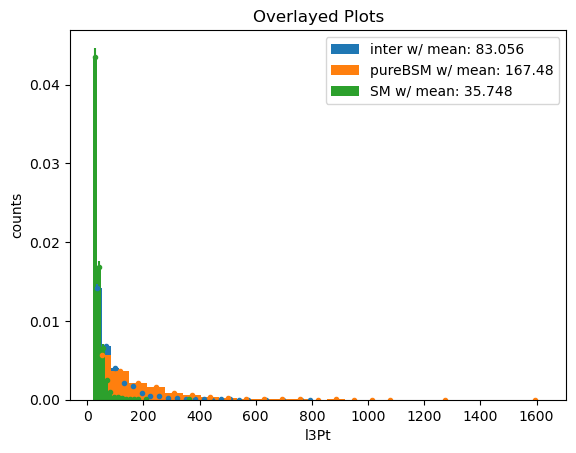

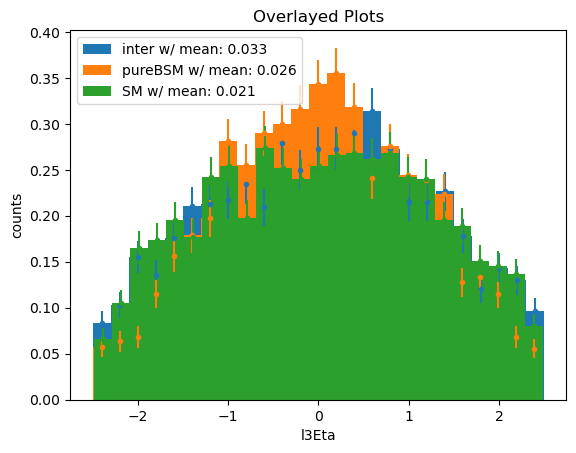

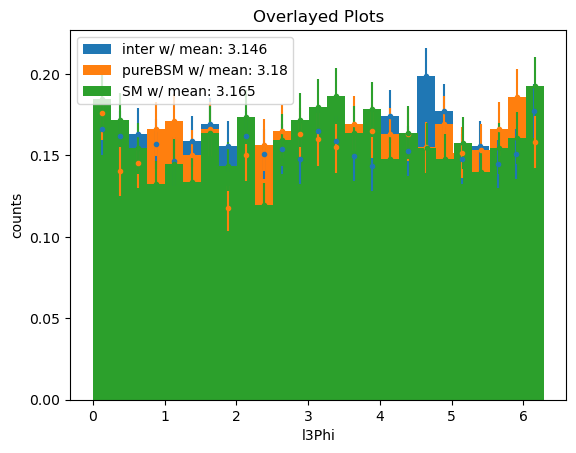

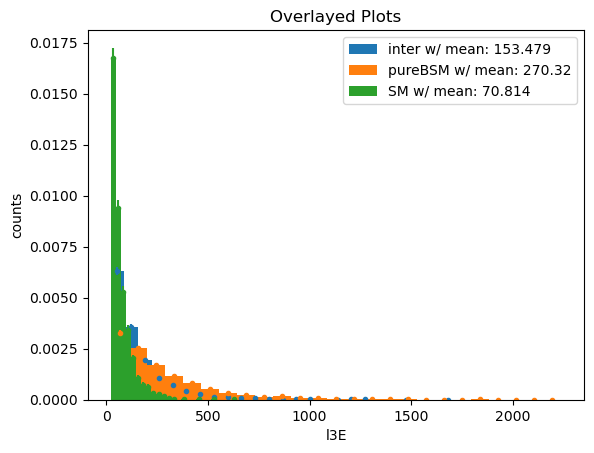

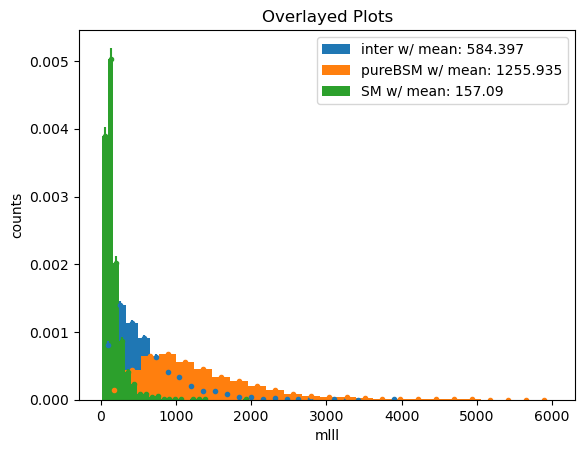

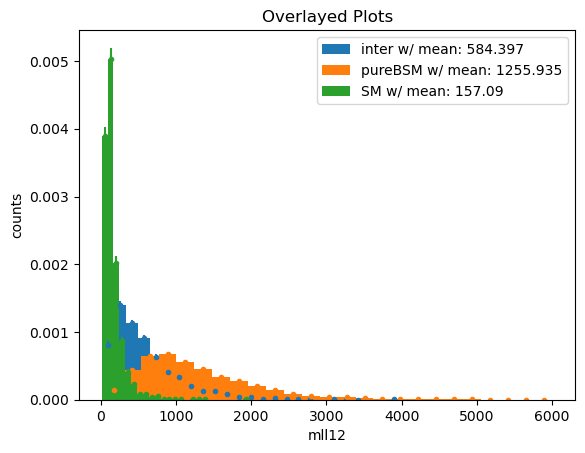

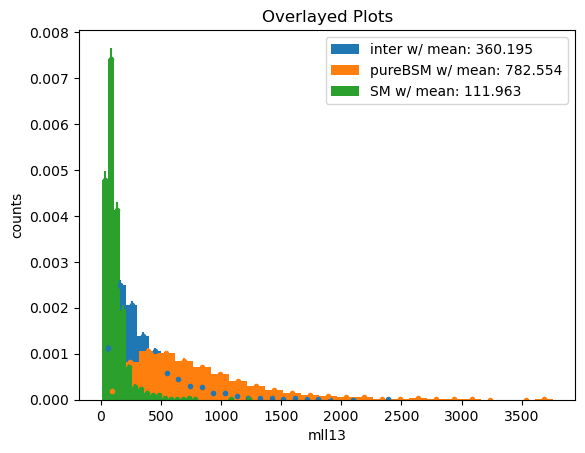

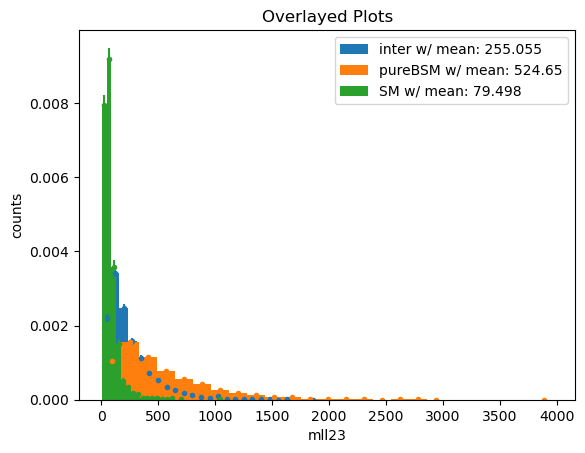

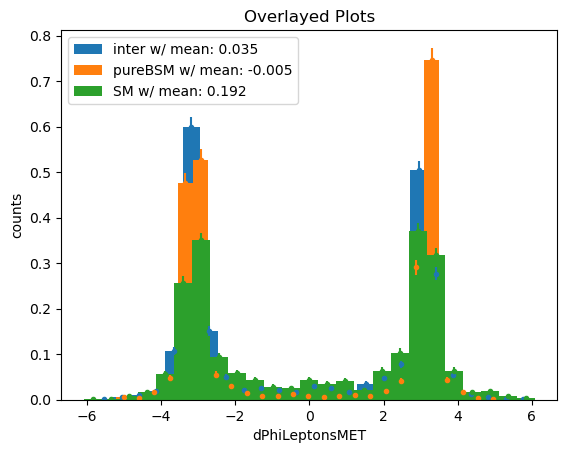

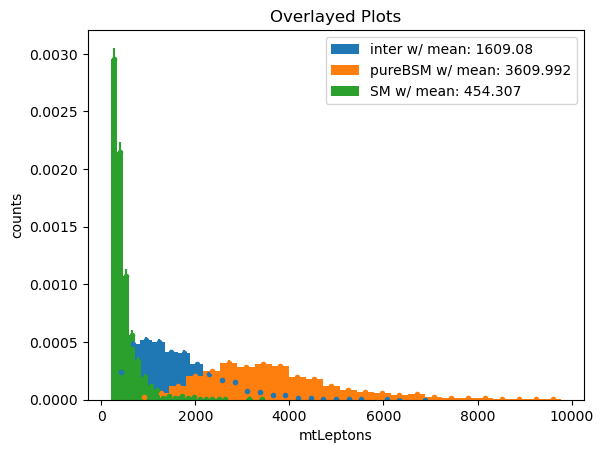

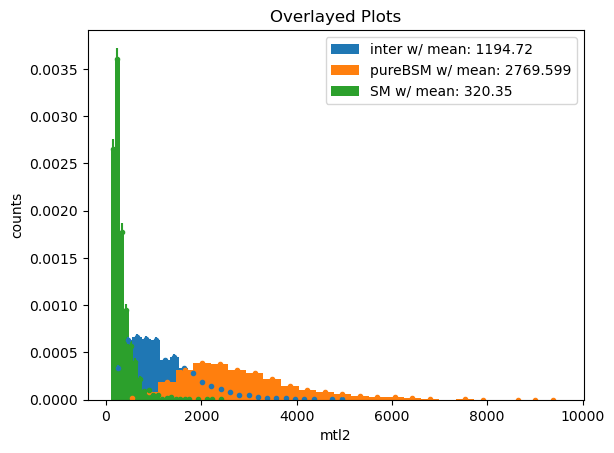

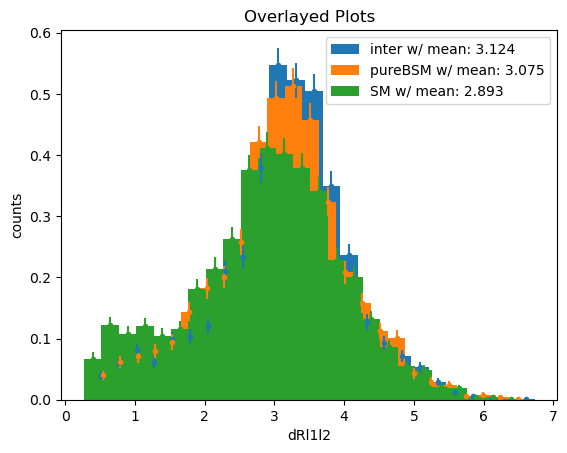

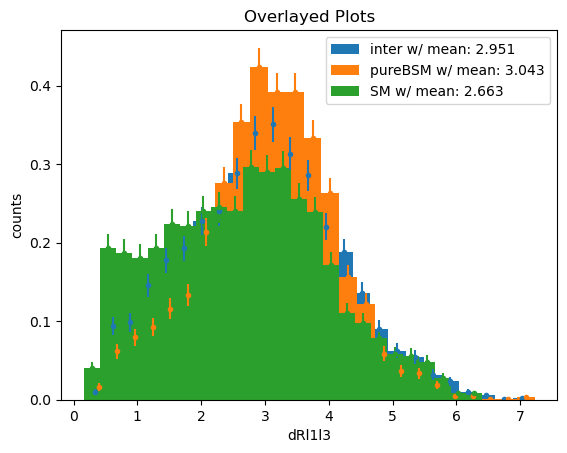

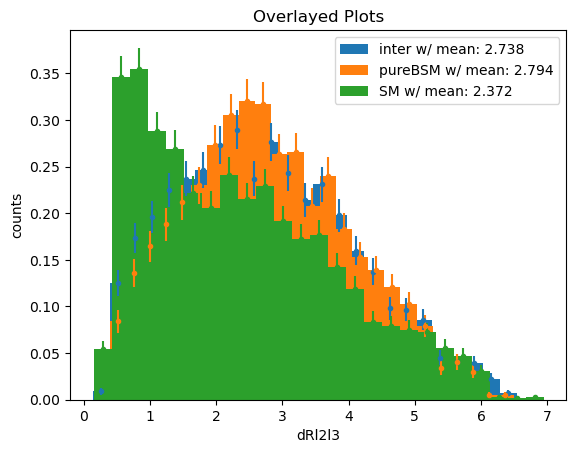

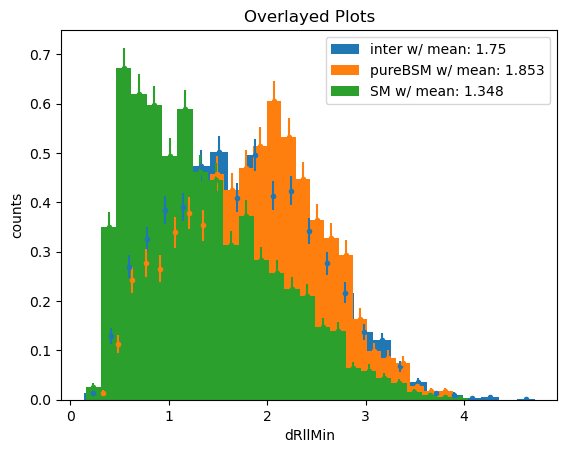

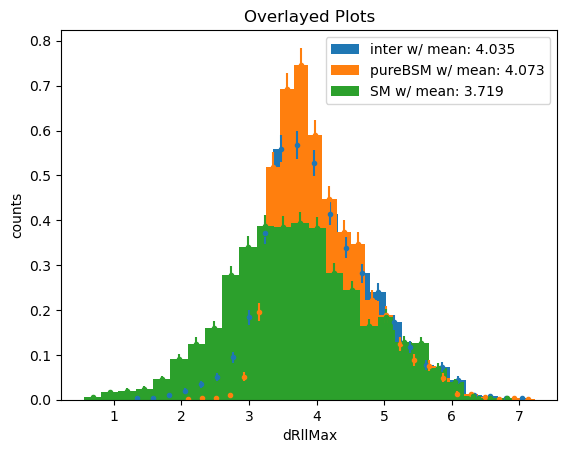

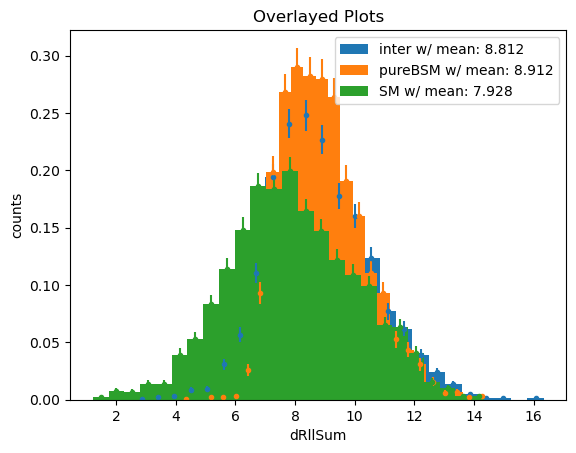

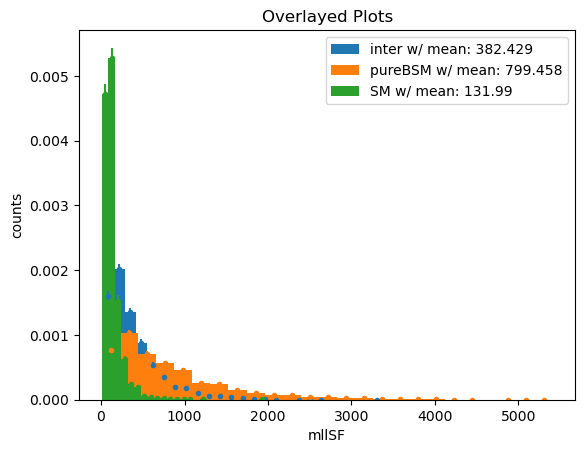

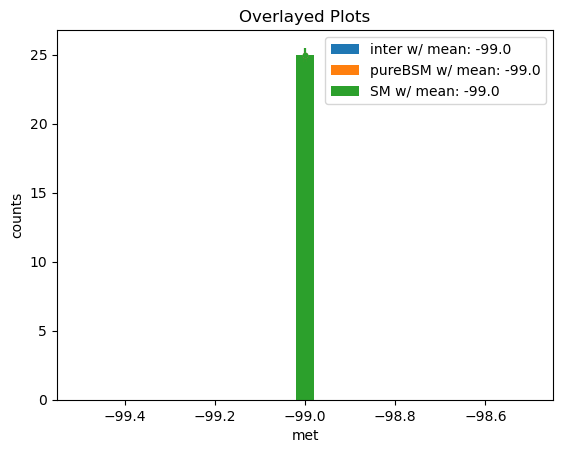

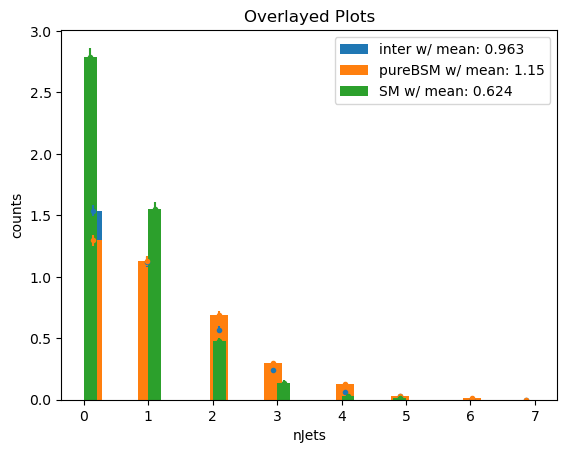

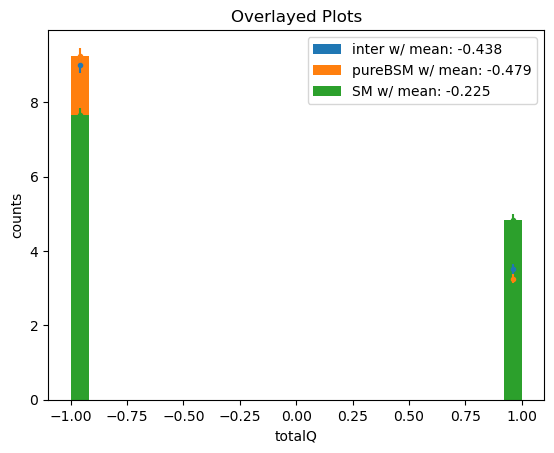

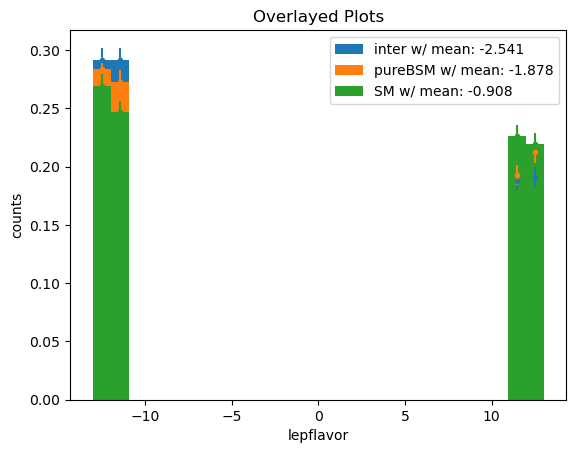

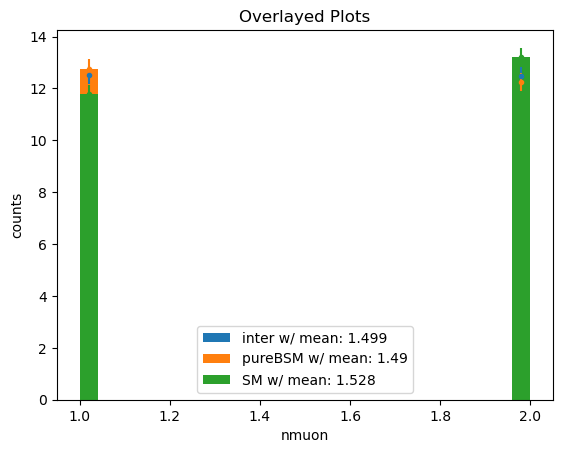

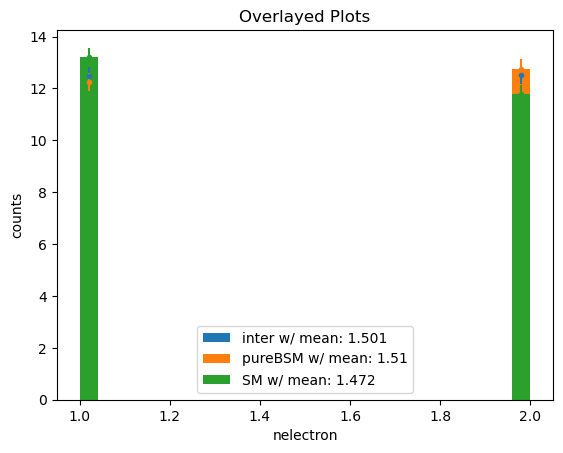

In [9]:
#1em11
inter_data = pd.read_csv("1em11_interference.csv", delimiter=" ")
pureBSM_data = pd.read_csv("1em11_pureAQGC.csv", delimiter=" ")
pureSM_data = pd.read_csv("pureSM.csv", delimiter=" ")

for col in cols:
    if col!="is3lepton":
        inter = inter_data[col]
        pureBSM = pureBSM_data[col]
        SM = pureSM_data[col]

        datas = {"inter": inter, "pureBSM":pureBSM, "SM": SM}
        graph_data(datas, col)

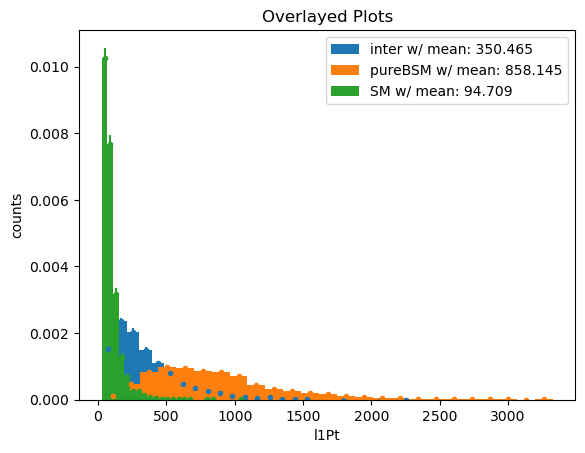

<class 'pandas.core.series.Series'>


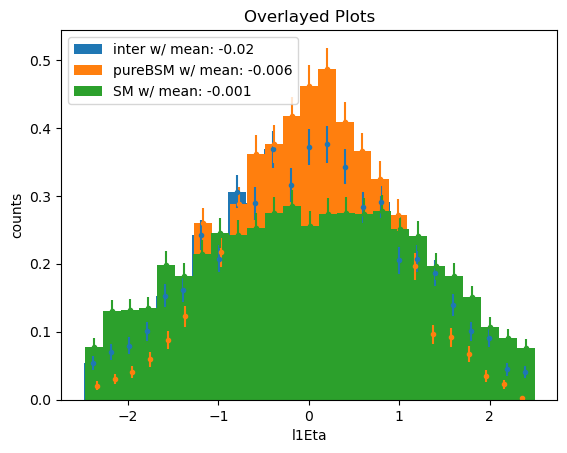

<class 'pandas.core.series.Series'>


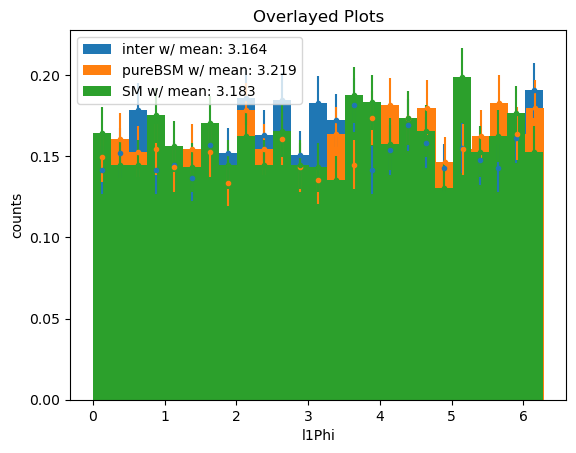

<class 'pandas.core.series.Series'>


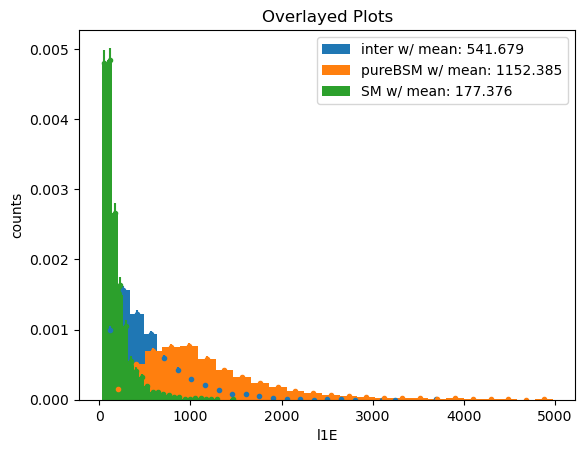

<class 'pandas.core.series.Series'>


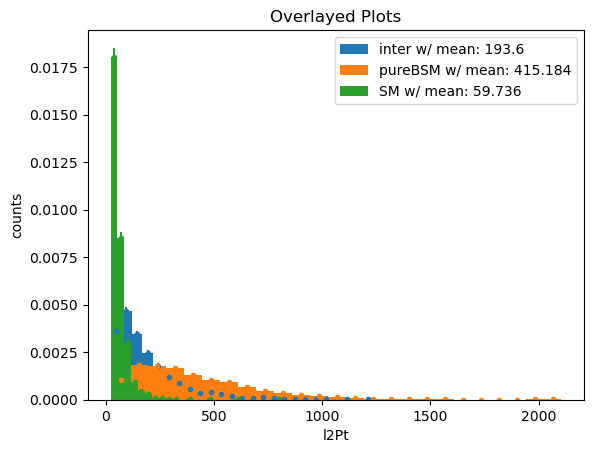

<class 'pandas.core.series.Series'>


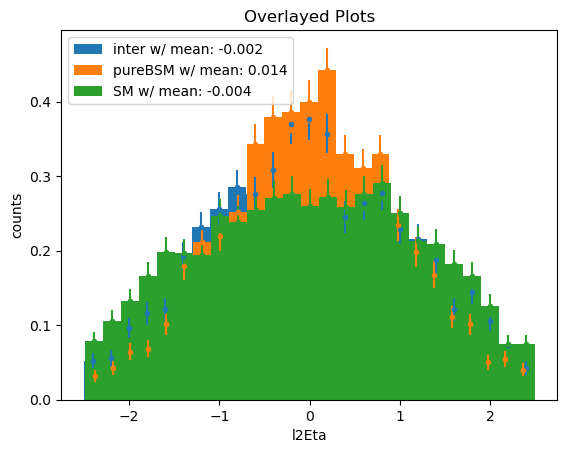

<class 'pandas.core.series.Series'>


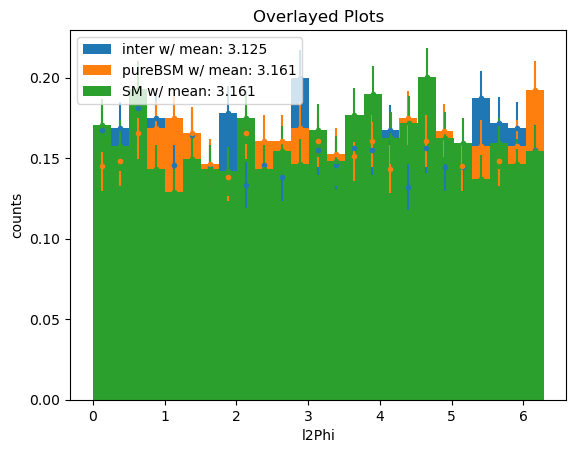

<class 'pandas.core.series.Series'>


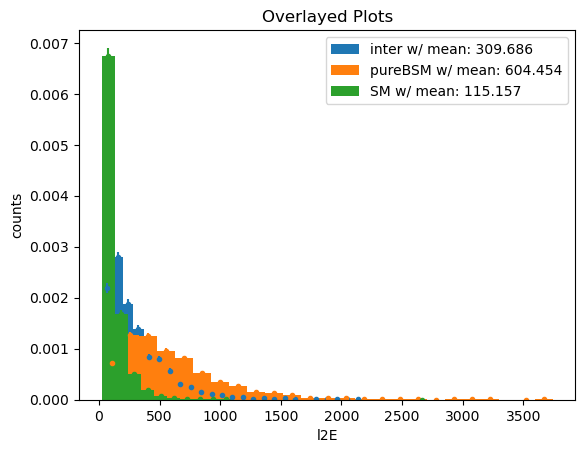

<class 'pandas.core.series.Series'>


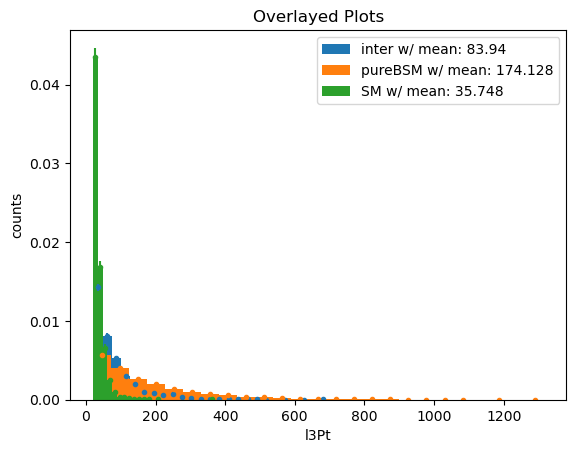

<class 'pandas.core.series.Series'>


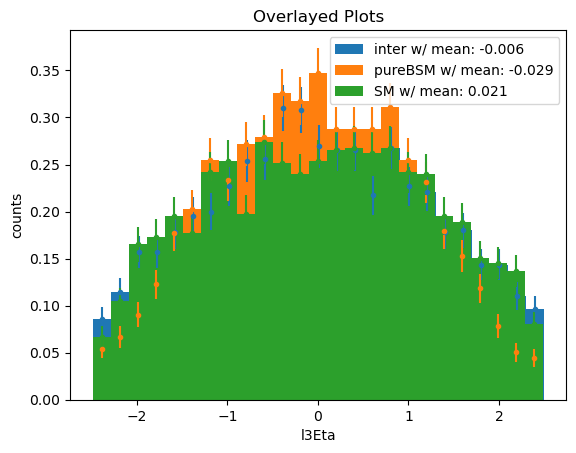

<class 'pandas.core.series.Series'>


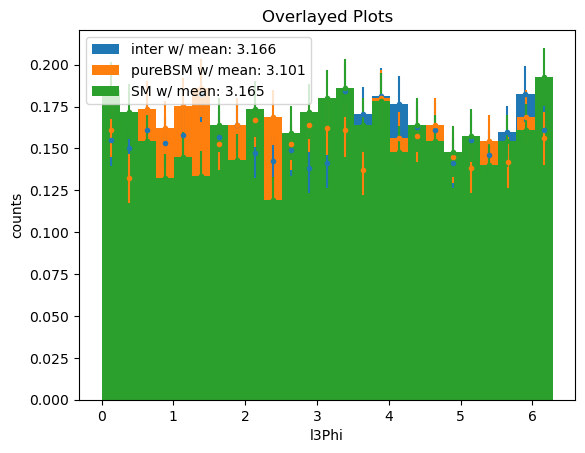

<class 'pandas.core.series.Series'>


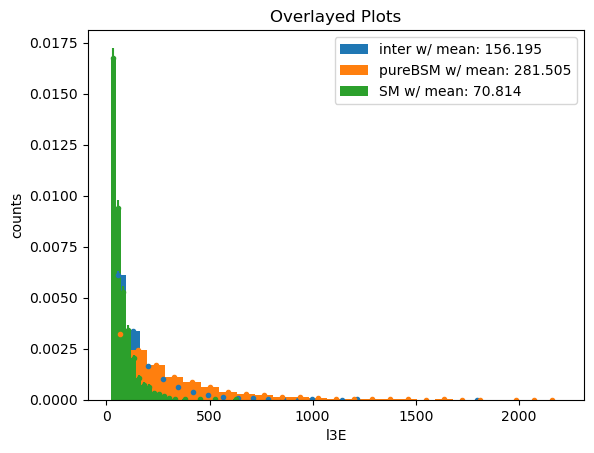

<class 'pandas.core.series.Series'>


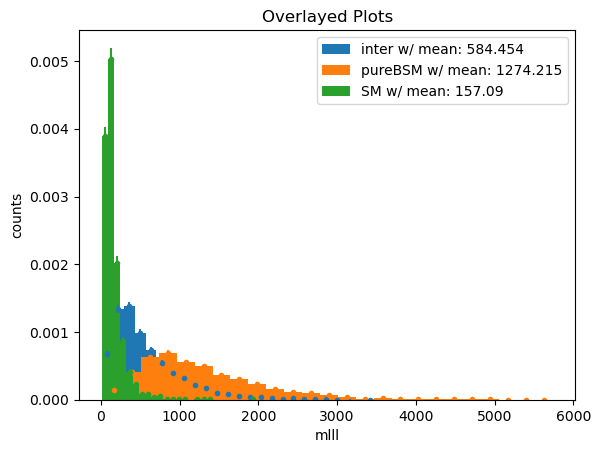

<class 'pandas.core.series.Series'>


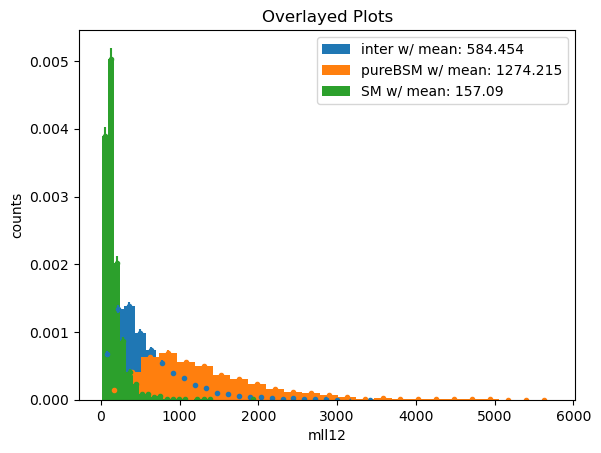

<class 'pandas.core.series.Series'>


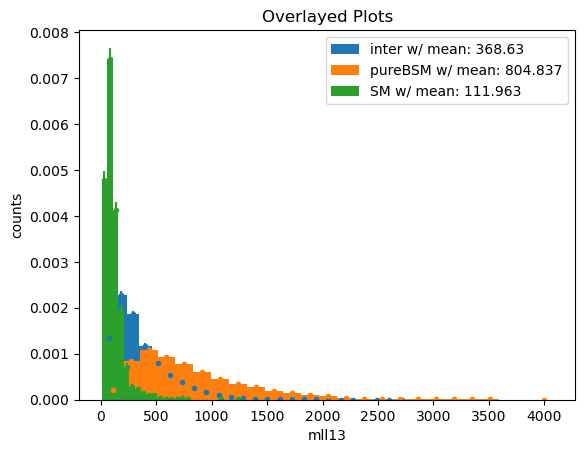

<class 'pandas.core.series.Series'>


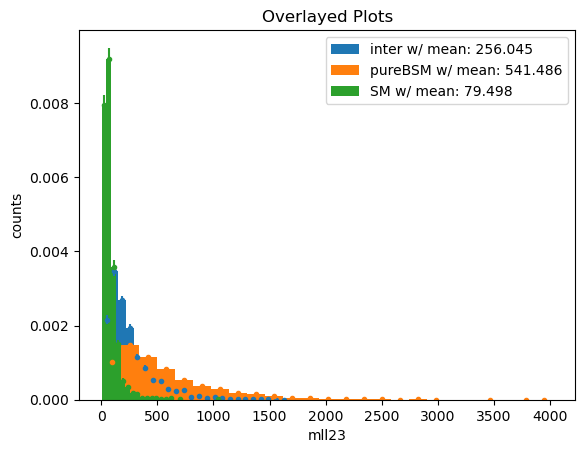

<class 'pandas.core.series.Series'>


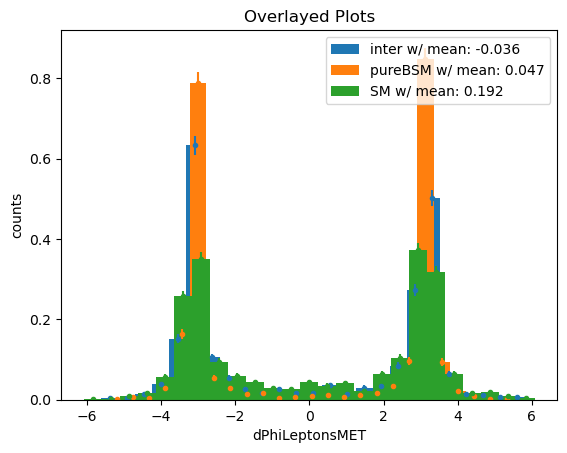

<class 'pandas.core.series.Series'>


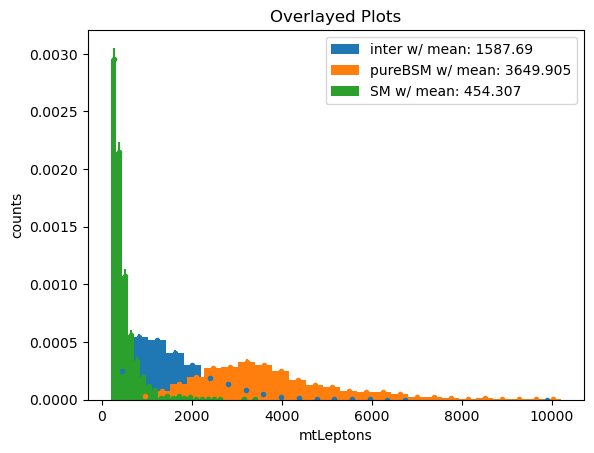

<class 'pandas.core.series.Series'>


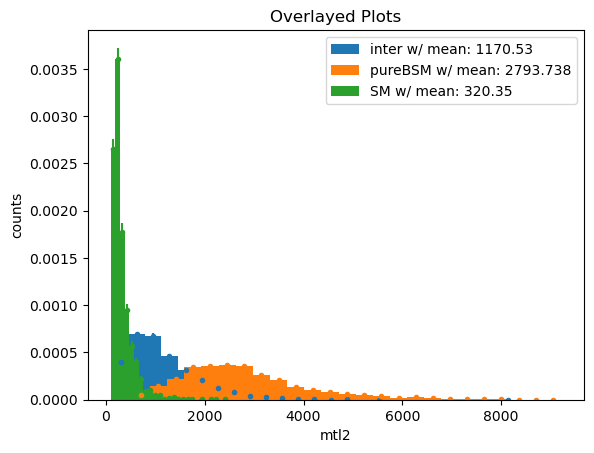

<class 'pandas.core.series.Series'>


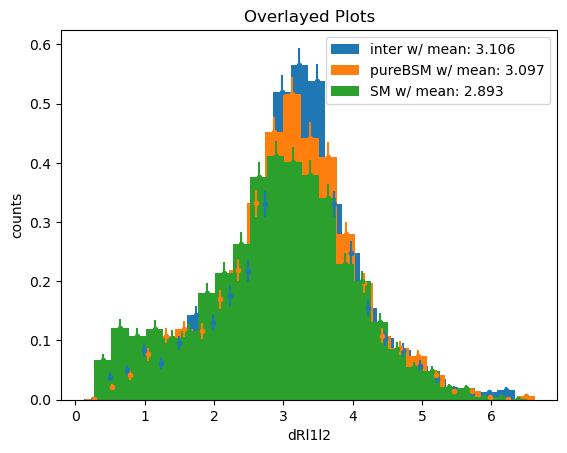

<class 'pandas.core.series.Series'>


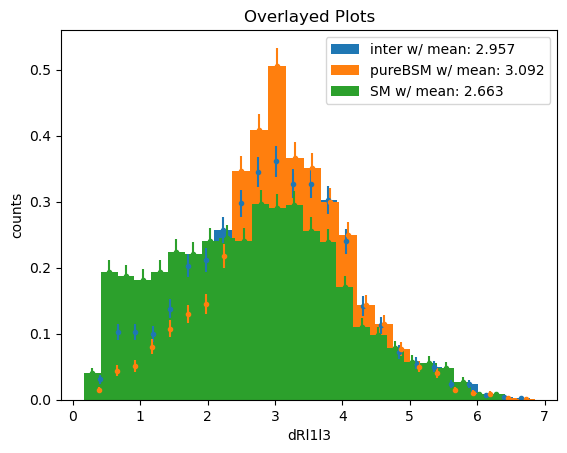

<class 'pandas.core.series.Series'>


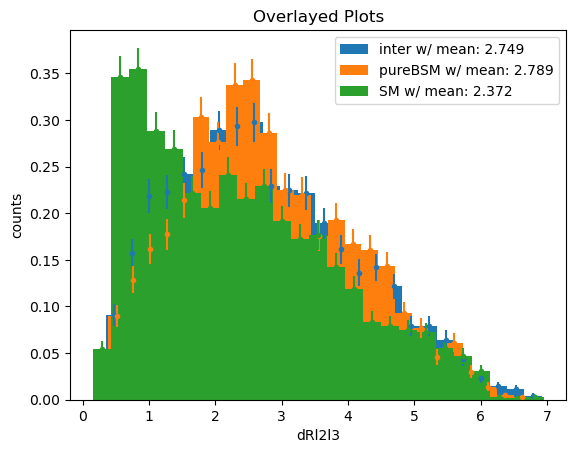

<class 'pandas.core.series.Series'>


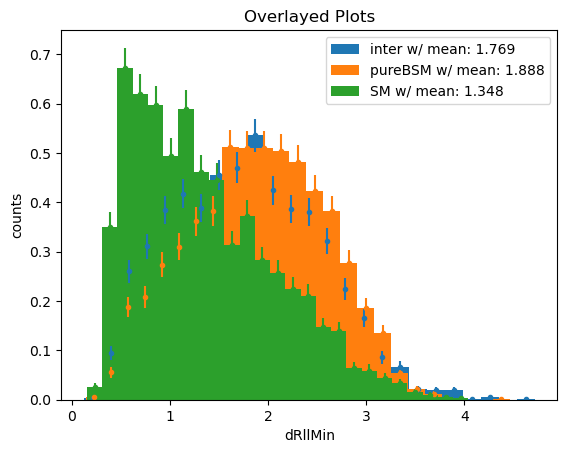

<class 'pandas.core.series.Series'>


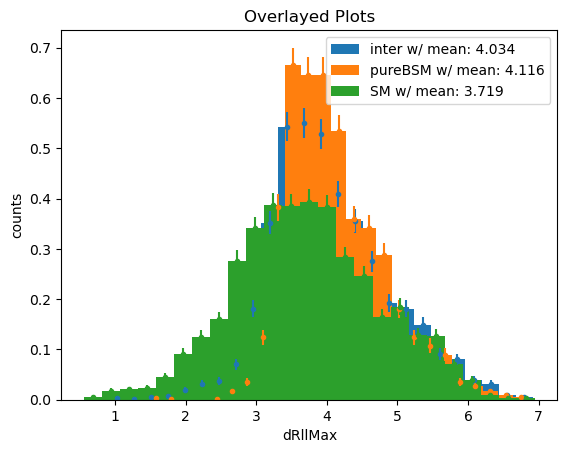

<class 'pandas.core.series.Series'>


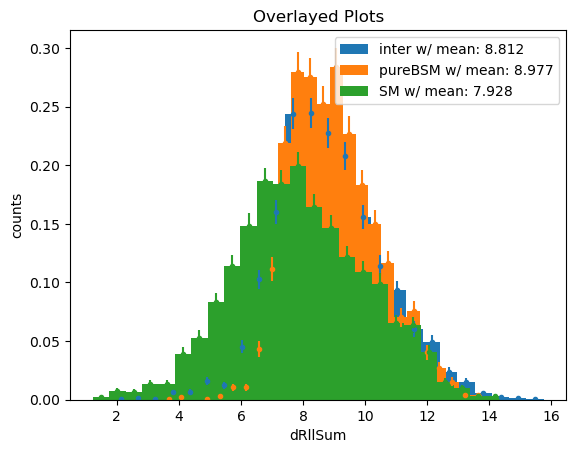

<class 'pandas.core.series.Series'>


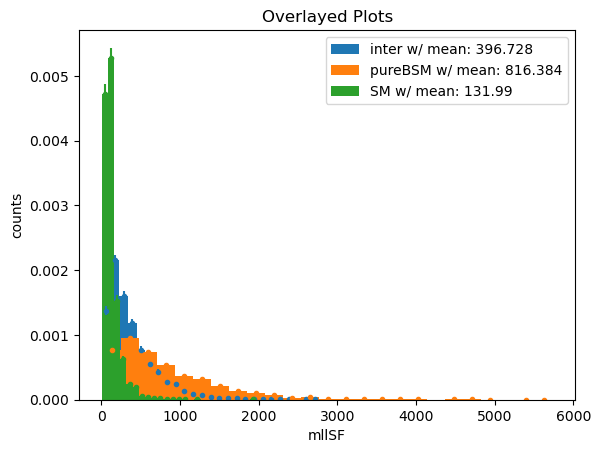

<class 'pandas.core.series.Series'>


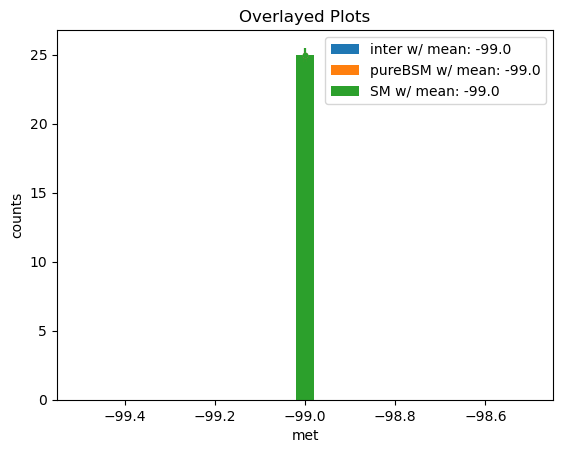

<class 'pandas.core.series.Series'>


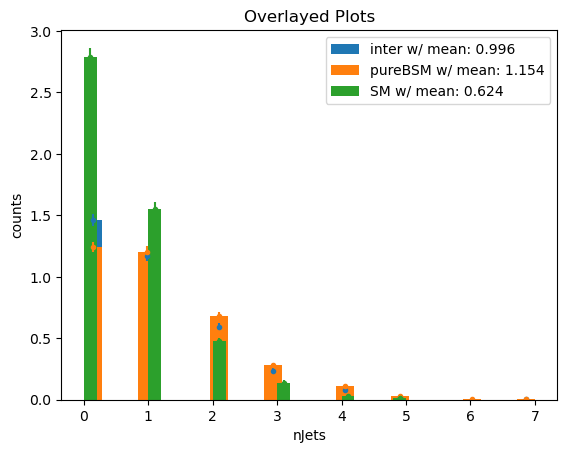

<class 'pandas.core.series.Series'>


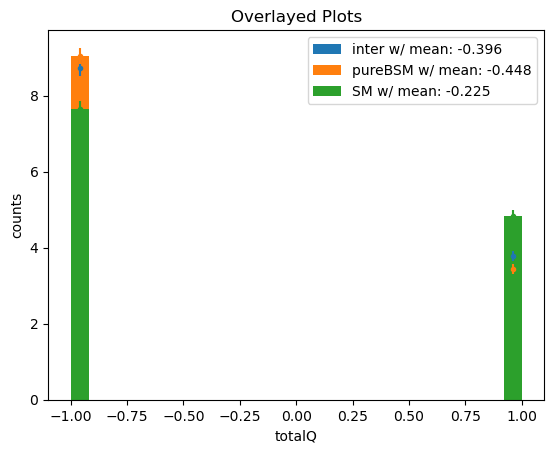

<class 'pandas.core.series.Series'>


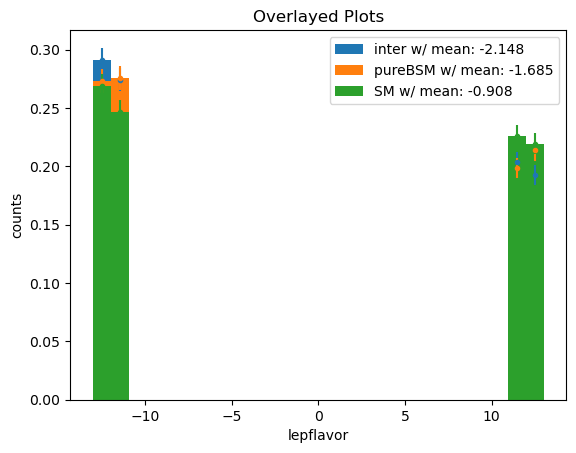

<class 'pandas.core.series.Series'>


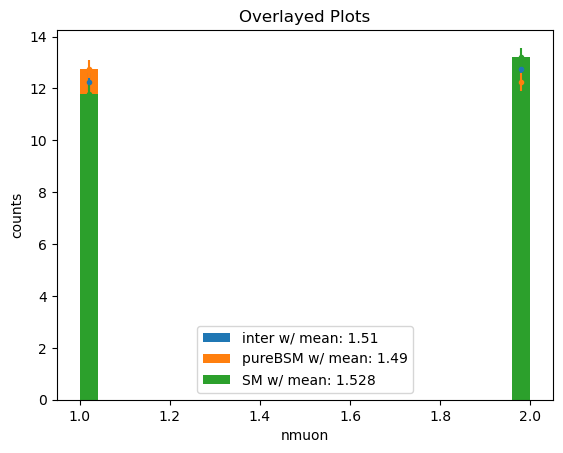

<class 'pandas.core.series.Series'>


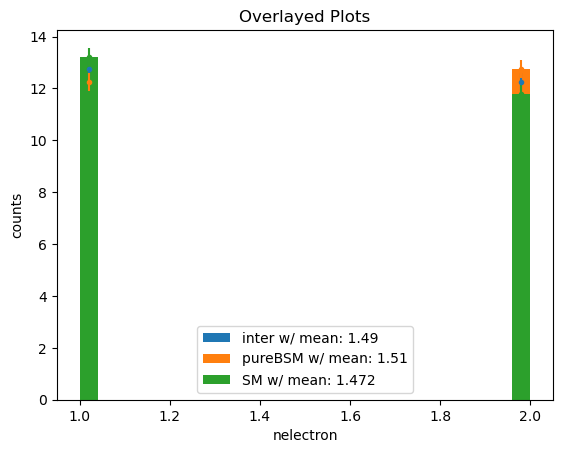

<class 'pandas.core.series.Series'>


In [10]:
#1em12
inter_data = pd.read_csv("1em12_interference.csv", delimiter=" ")
pureBSM_data = pd.read_csv("1em12_pureAQGC.csv", delimiter=" ")
pureSM_data = pd.read_csv("pureSM.csv", delimiter=" ")

for col in cols:
    if col!="is3lepton":
        inter = inter_data[col]
        pureBSM = pureBSM_data[col]
        SM = pureSM_data[col]

        datas = {"inter": inter, "pureBSM":pureBSM, "SM": SM}
        graph_data(datas, col)